# ExtraaLearn Project


## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

**Loading the data**

In [2]:
# load in the csv file from github repository
raw_github_url = "https://raw.githubusercontent.com/mikejoe144/MIT_Course_ElectiveProject/main/ExtraaLearn.csv" # You will need to fill this in with the actual URL

try:
    data = pd.read_csv(raw_github_url)
    print("CSV file loaded successfully!")
except Exception as e:
    print(f"Error loading CSV file: {e}")
    print("Please ensure the URL is correct and points to a raw CSV file.")

CSV file loaded successfully!


In [3]:
# Copying data to another variable to avoid any changes to original data
df = data.copy()

**View first 5 rows**

In [4]:

df.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


**Checking Info of data**

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Checking for missing values

In [6]:
print(df.isnull().sum().sort_values(ascending=False))

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


### Checking for duplicate rows

In [7]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### Displaying descriptive statistics

In [8]:
display(df.describe(include='all'))

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.000000,4612,4612,4612,4612.000000,4612.000000,4612.000000,4612,4612,4612,4612,4612,4612,4612.000000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT4612,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.201214,NaN,NaN,NaN,3.566782,724.011275,3.026126,NaN,NaN,NaN,NaN,NaN,NaN,0.298569
std,NaN,13.161454,NaN,NaN,NaN,2.829134,743.828683,1.968125,NaN,NaN,NaN,NaN,NaN,NaN,0.457680
min,NaN,18.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,36.000000,NaN,NaN,NaN,2.000000,148.750000,2.077750,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,51.000000,NaN,NaN,NaN,3.000000,376.000000,2.792000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,57.000000,NaN,NaN,NaN,5.000000,1336.750000,3.756250,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [9]:
# Selecting numerical columns and checking the summary statistics
num_cols = df.select_dtypes('number').columns

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


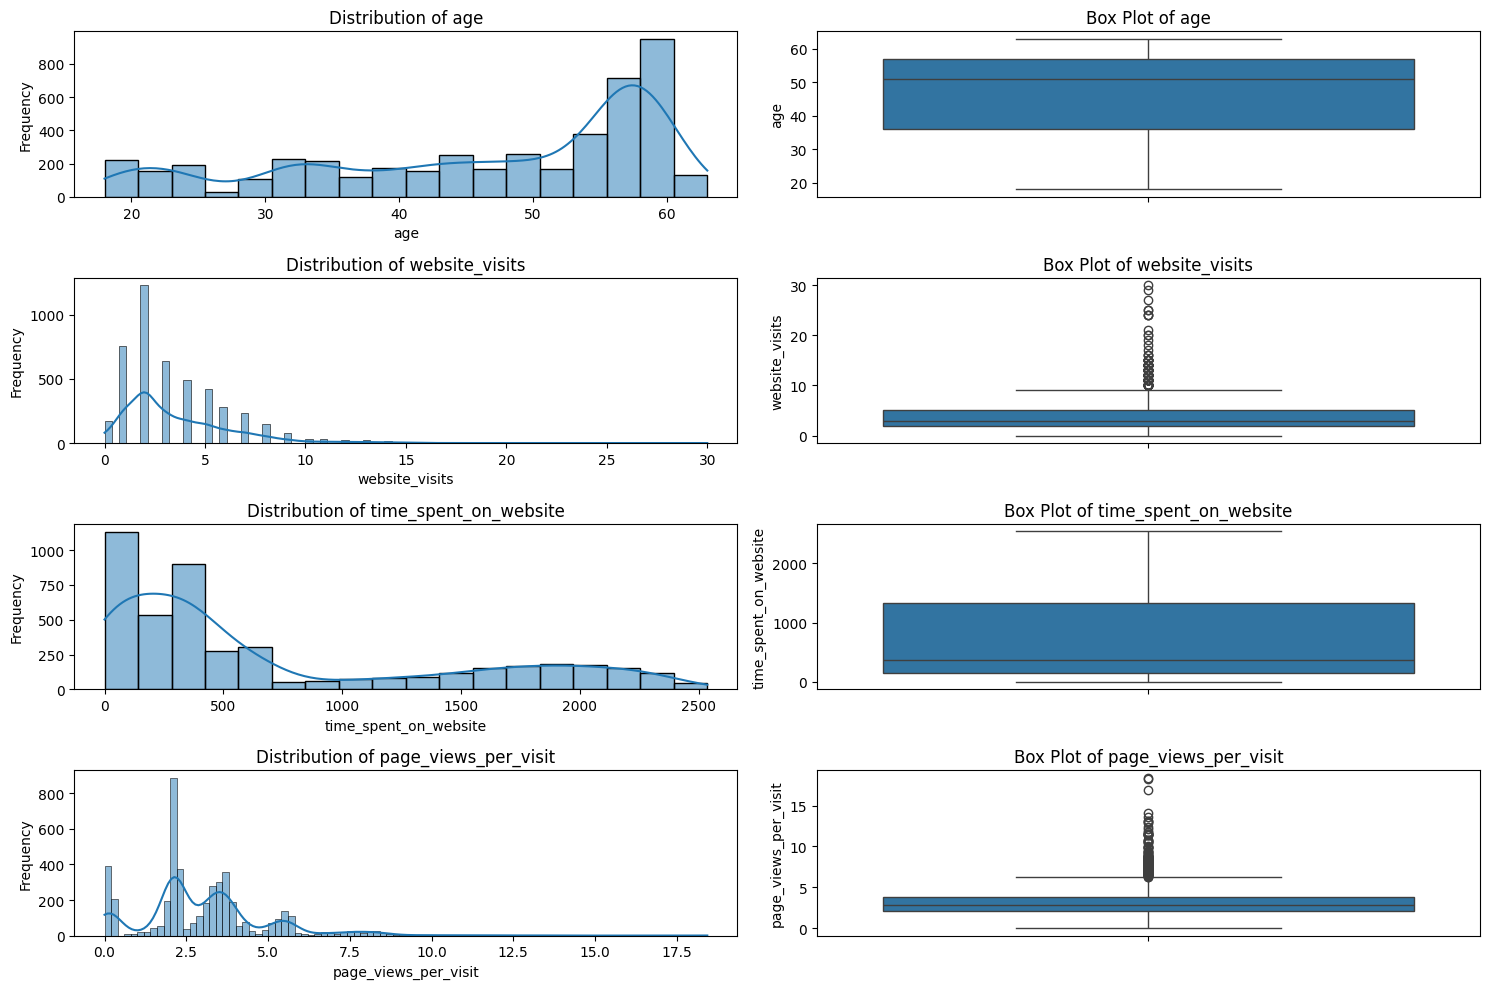

In [10]:
# Select numerical columns excluding 'status'
num_cols_for_hist = df.select_dtypes(include=np.number).columns.tolist()
if 'status' in num_cols_for_hist:
    num_cols_for_hist.remove('status')

# Loop through the selected numerical columns and plot histograms and boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_for_hist):
    plt.subplot(len(num_cols_for_hist), 2, i*2 + 1) # Histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(num_cols_for_hist), 2, i*2 + 2) # Boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Observations:

*   age distribution is left skewed, majority of leads are mid career
*   website visits are right skewed, there are some extremes of people visiting 30 times, but the average is 2-5
*   time spent on the website is right skewed, with a wide range of time
*   most people only visit 2-4 pages



**descriptive analysis of numeric features for conversions**

Descriptive statistics for numerical columns when status = 1:


,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656


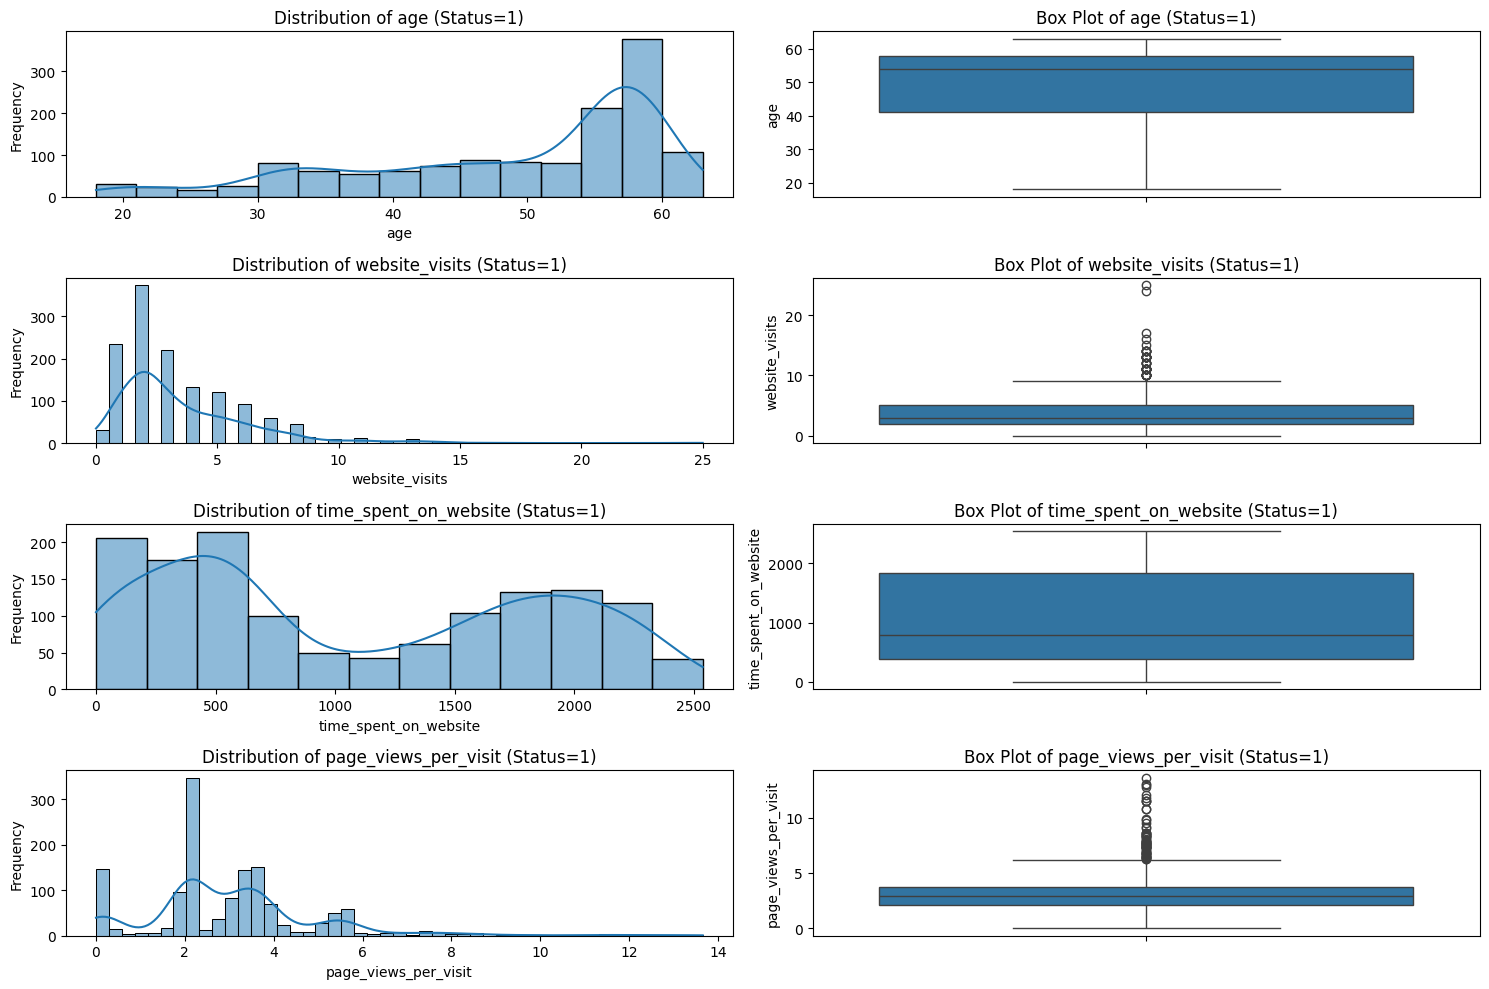

In [11]:
# Filter the DataFrame for status = 1 (converted leads)
df_converted = df[df['status'] == 1]

# Select numerical columns excluding 'status' (as it's already filtered to 1)
num_cols_for_analysis = df_converted.select_dtypes(include=np.number).columns.tolist()
if 'status' in num_cols_for_analysis:
    num_cols_for_analysis.remove('status')

print("Descriptive statistics for numerical columns when status = 1:")
display(df_converted[num_cols_for_analysis].describe().T)

# Loop through the selected numerical columns and plot histograms and boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_for_analysis):
    plt.subplot(len(num_cols_for_analysis), 2, i*2 + 1) # Histogram
    sns.histplot(df_converted[col], kde=True)
    plt.title(f'Distribution of {col} (Status=1)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(num_cols_for_analysis), 2, i*2 + 2) # Boxplot
    sns.boxplot(y=df_converted[col])
    plt.title(f'Box Plot of {col} (Status=1)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Observations

*   most of the conversions are people that are mid 50s. not a lot of the prospects under 30 lead to conversions.
*   spending over 1000 (seconds?) on the website appears to signal someone who will result in a conversion. this could be tied to people who spent more time creating their profile as we saw that leads to more conversions.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**does the current occupation affect lead status?**

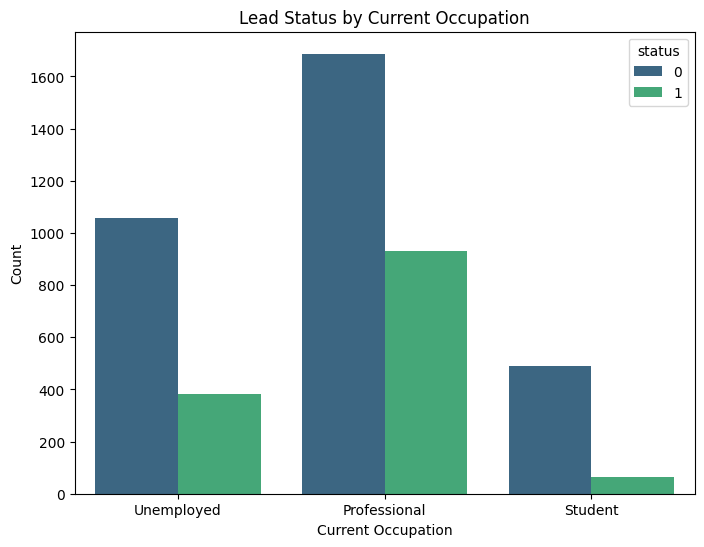

status,0,1
current_occupation,,
Professional,0.64,0.36
Student,0.88,0.12
Unemployed,0.73,0.27


In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='current_occupation', hue='status', palette='viridis')
plt.title('Lead Status by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.show()

# Also show conversion rates by occupation
occupation_status = df.groupby('current_occupation')['status'].value_counts(normalize=True).unstack()
display(occupation_status.round(2))

it appears that being a professional results in the most amount of converted leads. 36% of the professions convert to leads, 27% of the unemployed and 12% of the students.

**Did the first interaction seem to affect conversions?**

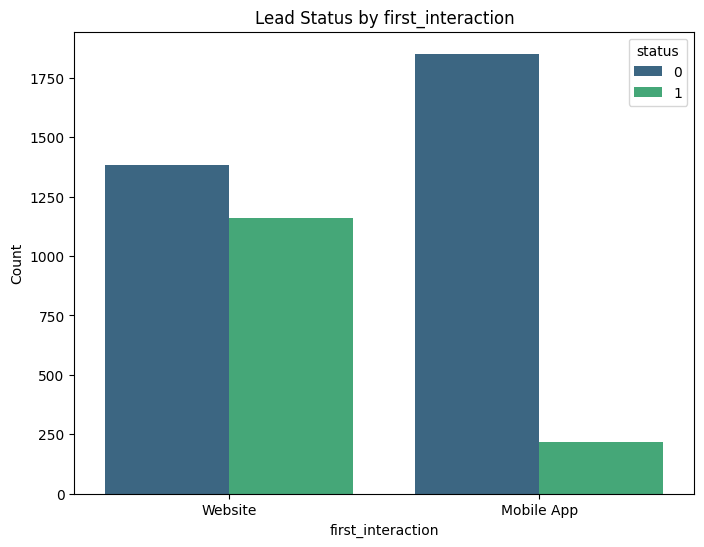

status,0,1
first_interaction,,
Mobile App,0.89,0.11
Website,0.54,0.46


In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='first_interaction', hue='status', palette='viridis')
plt.title('Lead Status by first_interaction')
plt.xlabel('first_interaction')
plt.ylabel('Count')
plt.show()

# Also show conversion rates by occupation
occupation_status = df.groupby('first_interaction')['status'].value_counts(normalize=True).unstack()
display(occupation_status.round(2))

It appears that more people's first interaction is through a website and that the websites lead to more conversions

**Does the method of interaction with the prospects matter?**

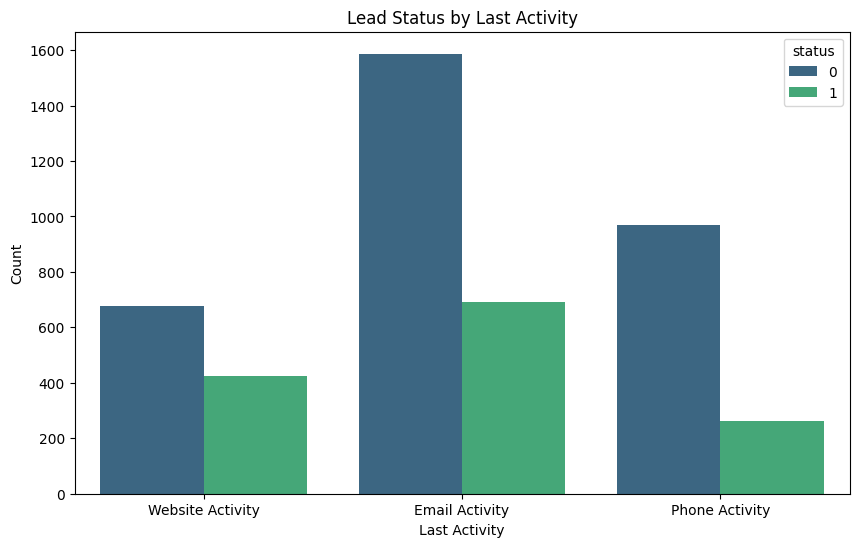

status,0,1
last_activity,,
Email Activity,0.70,0.30
Phone Activity,0.79,0.21
Website Activity,0.62,0.38


In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='last_activity', hue='status', palette='viridis')
plt.title('Lead Status by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.show()

# Calculate and display conversion rates by last activity
last_activity_status = df.groupby('last_activity')['status'].value_counts(normalize=True).unstack()
display(last_activity_status.round(2))

it appears that website activity has the best rate for conversions 38%, and phone activity is the least success rate of conversions 21%. email activity is the most common activity though and has the most amount of conversions through emails, ~700 conversions.

### 4. Which advertising channels have the highest lead conversion rate?

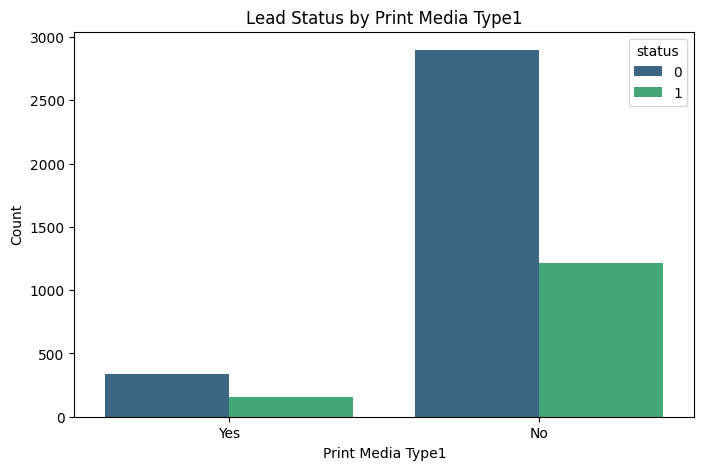

Conversion rates for Print Media Type1:


status,0,1
print_media_type1,,
No,0.70,0.30
Yes,0.68,0.32



--------------------------------------------------



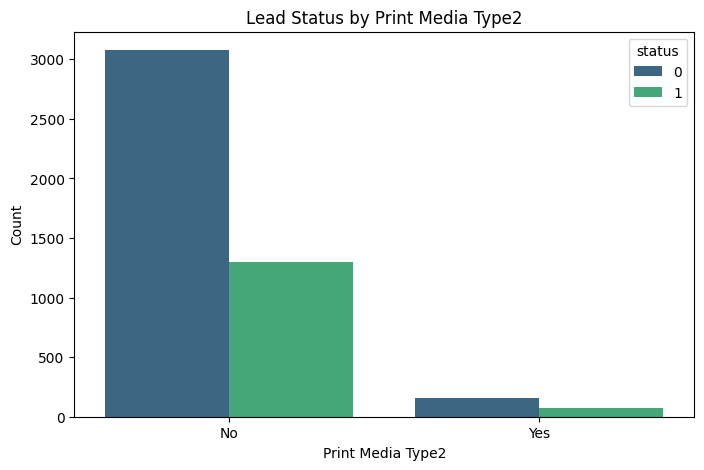

Conversion rates for Print Media Type2:


status,0,1
print_media_type2,,
No,0.70,0.30
Yes,0.68,0.32



--------------------------------------------------



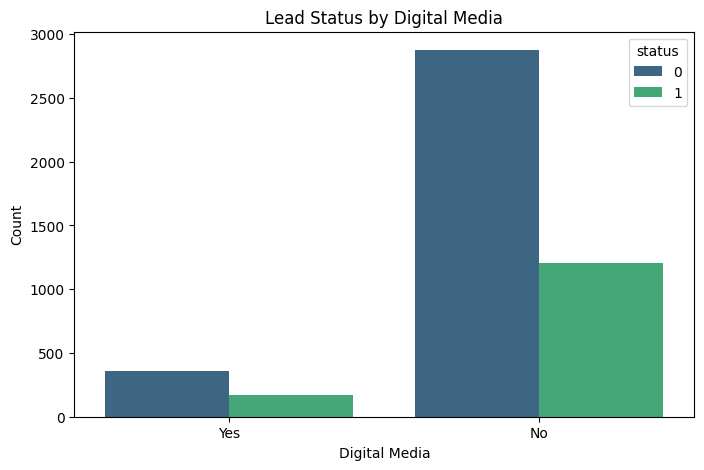

Conversion rates for Digital Media:


status,0,1
digital_media,,
No,0.70,0.30
Yes,0.68,0.32



--------------------------------------------------



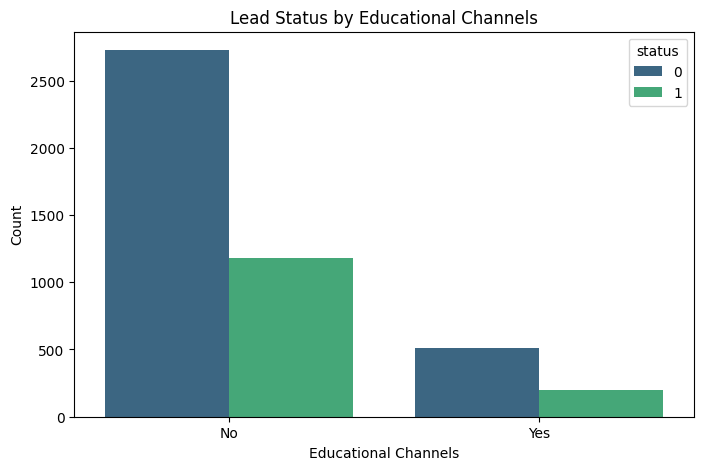

Conversion rates for Educational Channels:


status,0,1
educational_channels,,
No,0.70,0.30
Yes,0.72,0.28



--------------------------------------------------



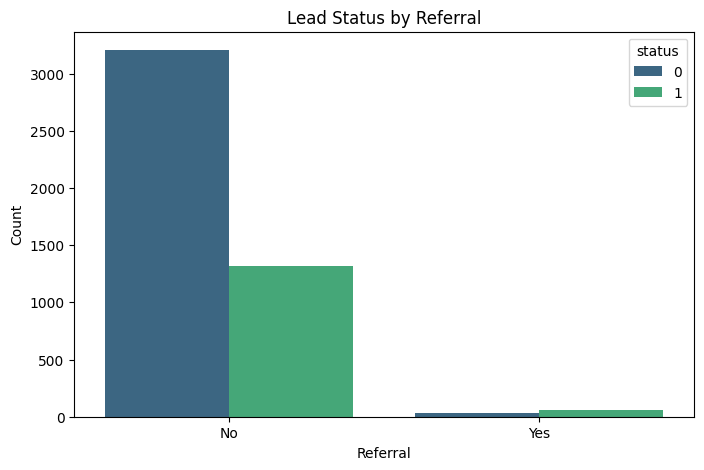

Conversion rates for Referral:


status,0,1
referral,,
No,0.71,0.29
Yes,0.32,0.68



--------------------------------------------------



In [15]:

media_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for channel in media_channels:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=channel, hue='status', palette='viridis')
    plt.title(f'Lead Status by {channel.replace("_", " ").title()}')
    plt.xlabel(channel.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()

    conversion_rate = df.groupby(channel)['status'].value_counts(normalize=True).unstack()
    print(f"Conversion rates for {channel.replace('_', ' ').title()}:")
    display(conversion_rate.round(2))
    print("\n" + "-"*50 + "\n")


referals had the highest rate of conversion at 68%. in terms of most conversions in total, education channels had the highest.  

**People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

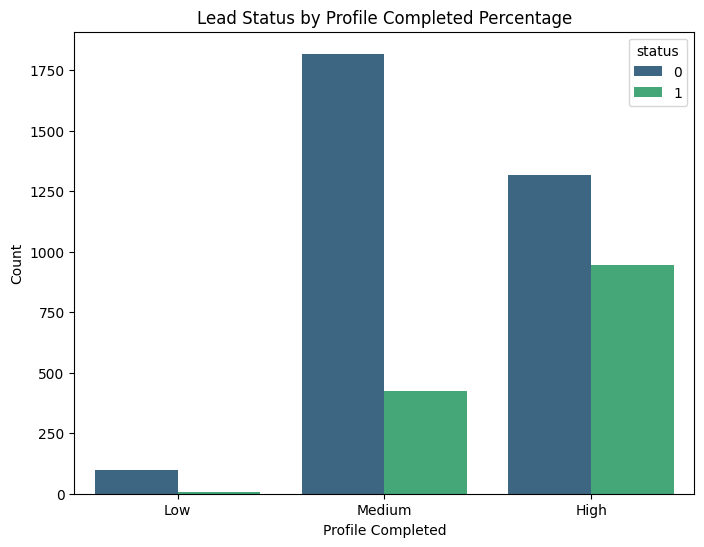

status,0,1
profile_completed,,
High,0.58,0.42
Low,0.93,0.07
Medium,0.81,0.19


In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='profile_completed', hue='status', palette='viridis', order=['Low', 'Medium', 'High'])
plt.title('Lead Status by Profile Completed Percentage')
plt.xlabel('Profile Completed')
plt.ylabel('Count')
plt.show()

# Calculate and display conversion rates by profile completed status
profile_completed_status = df.groupby('profile_completed')['status'].value_counts(normalize=True).unstack()
display(profile_completed_status.round(2))

it appears that people who have spent more time completing their profile were more likely to convert.

**pairwise correlations between all the numerical variables.**

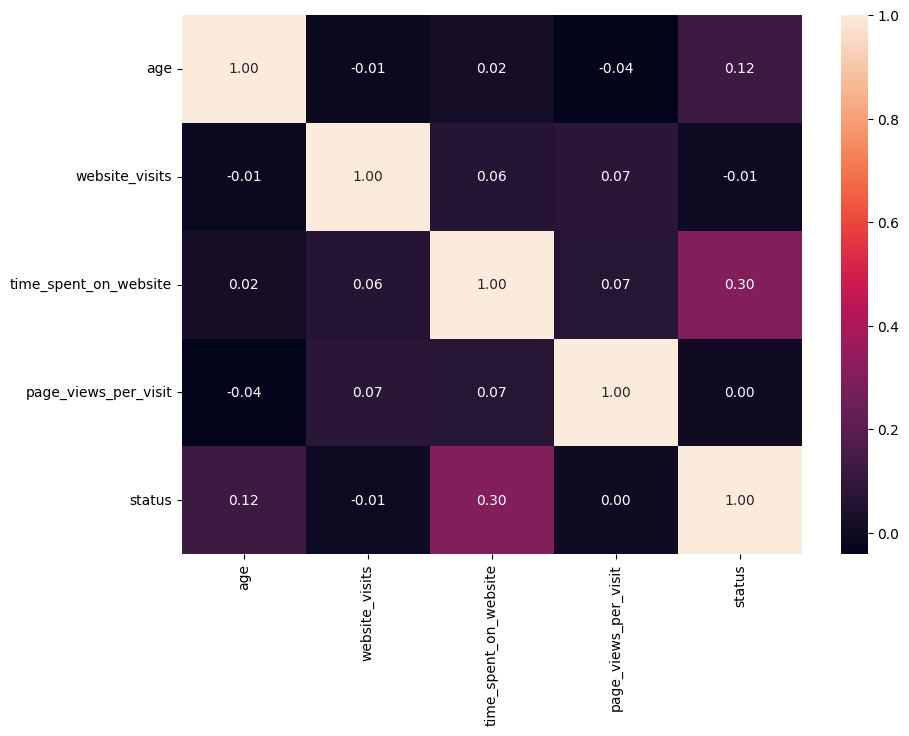

In [19]:
plt.figure(figsize=(10, 7))

# Select only the numeric columns
numeric_data = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")

plt.show()

of the numerical features, time spent on website has the highest correlation to conversions

## Preprocessing for Correlation Matrix

### Subtask:
Convert categorical features to numerical format using one-hot encoding and drop the 'ID' column. This prepares the data for correlation analysis.


**Reasoning**:
To prepare the data for correlation analysis, I will first create a copy of the dataframe, then identify categorical columns and apply one-hot encoding, and finally drop the original categorical columns and the 'ID' column as instructed.



In [27]:
df_processed = df.copy()

# Drop the 'ID' column as it's not needed for correlation and is not a feature
df_processed = df_processed.drop('ID', axis=1)

# Identify all categorical columns
categorical_cols_for_dummies = df_processed.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding WITHOUT dropping the first category
df_processed = pd.get_dummies(df_processed, columns=categorical_cols_for_dummies, dtype=int)

print("Shape of df_processed after one-hot encoding:", df_processed.shape)
print("First 5 rows of df_processed:")
display(df_processed.head())

Shape of df_processed after one-hot encoding: (4612, 26)
First 5 rows of df_processed:


,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,0,0,1,0,1,...,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.320,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.074,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.057,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.914,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


**Reasoning**:
Now that the data has been preprocessed with one-hot encoding and the 'ID' column dropped, the next step is to calculate the correlation matrix, specifically focusing on the 'status' column to identify features most correlated with conversions, and then visualize it using a heatmap.



Correlations with 'status':


,status
status,1.000000
first_interaction_Website,0.381077
time_spent_on_website,0.302100
profile_completed_High,0.255933
current_occupation_Professional,0.141476
age,0.122084
referral_Yes,0.118761
last_activity_Website Activity,0.105144
educational_channels_No,0.017763
print_media_type1_Yes,0.016214


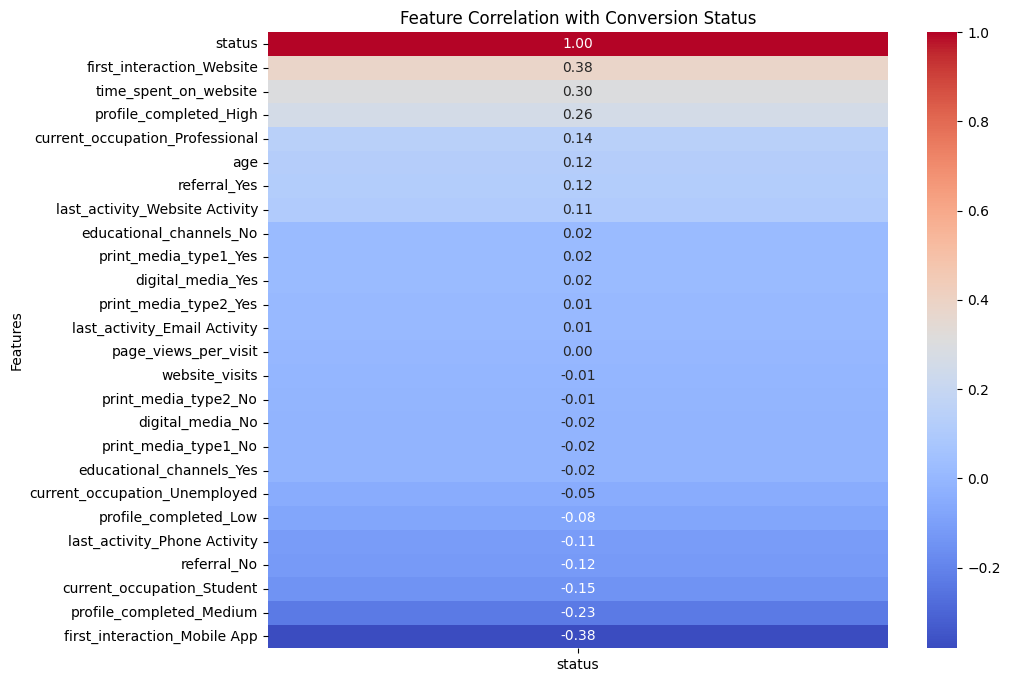

In [29]:
correlation_matrix = df_processed.corr()

# Sort the correlations with 'status' in descending order
status_correlations = correlation_matrix['status'].sort_values(ascending=False)
print("Correlations with 'status':")
display(status_correlations)

# Visualize the correlation matrix focusing on 'status'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['status']].sort_values(by='status', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Conversion Status')
plt.ylabel('Features')
plt.show()



*   The feature `first_interaction_Website` showed the strongest positive correlation with conversion status (approximately 0.381).
*   `time_spent_on_website` also exhibited a notable positive correlation with conversion status (approximately 0.302).
*   Conversely, `profile_completed_Medium` showed the most significant negative correlation with conversion status (approximately -0.233).
why is `profile_completed_Medium` have a more negative correlation than `profile_completed_Low`? i would have thought it would be switched.
*   `current_occupation_Student` also had a negative correlation with conversion status (approximately -0.147).


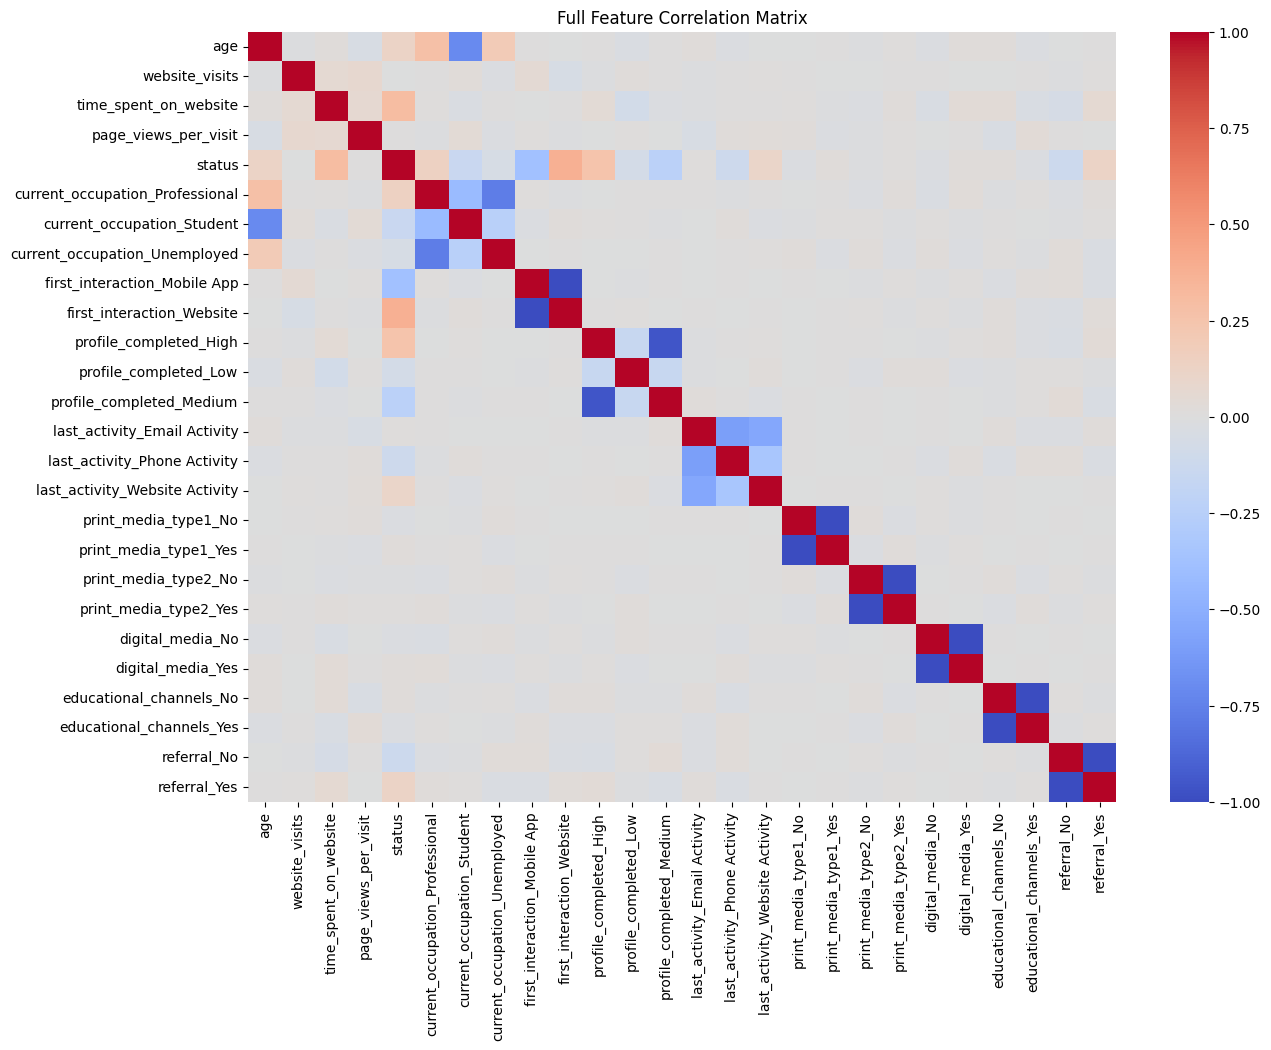

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Full Feature Correlation Matrix')
plt.show()

age is negatively correlated to being a student which makes sense, younger are more likely college age. the older you are the more likely you are unemployed or a proffesional

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Building a Decision Tree model

## Model Performance evaluation and improvement

## Building a Random Forest model

## Model Performance evaluation and improvement

## Actionable Insights and Recommendations

# Task
Preprocess the `df` DataFrame by one-hot encoding categorical features, dropping the 'ID' column, then calculate and visualize the correlation matrix, focusing on the 'status' column with a heatmap to identify features most correlated with conversions.